<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-02/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

df = pd.read_html(url, attrs={"class": "wikitable collapsible collapsed"})[3]


In [163]:
#Вивести перші рядки таблиці за допомогою методу head
df.head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [164]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

df.shape

(28, 9)

In [165]:
from numpy import nan
#Замініть у таблиці значення "—" на значення NaN

df_new = df.replace("—", nan)
df_new.head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


In [166]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [167]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df_new = df.replace("—", nan)

for cur_col in df_new.columns:
  df_new[cur_col] = pd.to_numeric(df_new[cur_col], errors='ignore')
df_new.dtypes


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [168]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

#df_new = df.replace("—", nan)[:4]
for cur_col in df_new.columns:
    iter_null=0.0
    for itr in df_new[cur_col].isnull():
      if itr:
        iter_null+=1
    print("column:"+cur_col.title())
    if iter_null == 0.0:
      print(iter_null)
    else:
      print(iter_null/len(df_new[cur_col]))
 

column:Регіон
0.0
column:1950
0.07142857142857142
column:1960
0.03571428571428571
column:1970
0.03571428571428571
column:1990
0.0
column:2000
0.0
column:2012
0.0
column:2014
0.07142857142857142
column:2019
0.14285714285714285


In [169]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df_del = df.drop(df.shape[0]-1, axis=0)
df_del


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [170]:
from numpy import nan 
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
#df_mean = df_new.interpolate(method='linear', axes='columns')

df_new = df.replace("—", nan).drop(df.shape[0]-1, axis=0)

for cur_col in df_new.columns:
  df_new[cur_col] = pd.to_numeric(df_new[cur_col], errors='ignore')
df_new.fillna(dict(df_new.mean(axis=0)), inplace=True)
df_new

<ipython-input-170-52044f61bdbb>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.fillna(dict(df_new.mean(axis=0)), inplace=True)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


In [171]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
for ind,cur in dict(df_new['2019'].gt(df_new['2019'].mean())).items():
  if cur:
    print(df_new['Регіон'][ind])
    #print(df_new['2019'][ind])

Волинська
Закарпатська
Івано-Франківська
Львівська
Одеська
Рівненська
Херсонська
Чернівецька
Київ


In [172]:
#У якому регіоні була найвища народжуваність у 2014 році?
print(df_new['Регіон'][df_new['2014'].idxmax()])


Рівненська


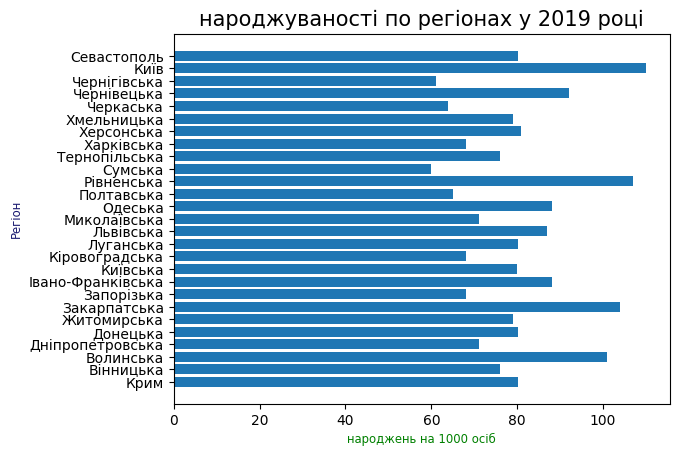

In [173]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt
%matplotlib inline

plt.barh(
    df_new['Регіон'],
    df_new['2019'],   
)

plt.ylabel("Регіон", fontsize="small", color="midnightblue", rotation=90 )
plt.xlabel("народжень на 1000 осіб", fontsize="small", color="g")
plt.title("народжуваності по регіонах у 2019 році", fontsize=15)
plt.show()